# Library Imports

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows', 500)

# Tracks Streaming Data

## Data Exploration / EDA

In [3]:
# let's load the tracks_df again
tracks_df = pd.read_csv('datasets/tracks_df.csv')
tracks_df.sample(5)

C:\Users\Kim\AppData\Local\Temp\ipykernel_26216\4189168743.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  tracks_df = pd.read_csv('datasets/tracks_df.csv')


,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
8704,2017-07-05T02:23:08Z,"Android OS 7.1.1 API 25 (Sony, E6683)",142759,ID,I Know It's Not Easy but You're Not Alone Anymore,In Love With a Ghost,Healing,spotify:track:7xRfZ4bQgEg60LQa3vgx02,NaN,NaN,NaN,trackdone,NaN,True,NaN,False,1499221243251,False
58382,2020-05-28T04:11:11Z,Windows 10 (10.0.18362; x64),134613,JP,Kiss With a Fist,Florence + The Machine,A Lot of Love. a Lot of Blood,spotify:track:7EYR17bHR2ZkJ8o2mKSJDU,NaN,NaN,NaN,trackdone,trackdone,True,NaN,False,1590638935587,False
105091,2022-10-10T07:06:03Z,"Android OS 11 API 30 (OnePlus, HD1910)",180952,JP,Would You Be So Kind,dodie,You - EP,spotify:track:3ZiuxcBeRanTjfHzVBuuQe,NaN,NaN,NaN,trackdone,trackdone,False,NaN,False,1665385381056,False
9229,2017-07-15T06:18:45Z,"Android OS 7.1.1 API 25 (Sony, E6683)",247484,ID,Healing,In Love With a Ghost,Healing,spotify:track:0GbSslWDNItJQPA788gr20,NaN,NaN,NaN,trackdone,NaN,False,NaN,False,1500099276285,False
48128,2019-08-04T15:36:01Z,Windows 10 (10.0.17134; x64),208346,JP,パプリカ,Foorin,Paprika,spotify:track:0bdYJCO9clK9ew61Z7GqMf,NaN,NaN,NaN,trackdone,trackdone,False,NaN,False,1564932749255,False


In [3]:
print(tracks_df.shape)
print(tracks_df.columns)

(129393, 18)
Index(['ts', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')


In [4]:
# let's take a look at the tracks_df again
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129393 entries, 0 to 129392
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ts                                 129393 non-null  object 
 1   platform                           129393 non-null  object 
 2   ms_played                          129393 non-null  int64  
 3   conn_country                       129393 non-null  object 
 4   master_metadata_track_name         129393 non-null  object 
 5   master_metadata_album_artist_name  129393 non-null  object 
 6   master_metadata_album_album_name   129393 non-null  object 
 7   spotify_track_uri                  129393 non-null  object 
 8   episode_name                       0 non-null       float64
 9   episode_show_name                  0 non-null       float64
 10  spotify_episode_uri                0 non-null       float64
 11  reason_start                       1293

Columns description
- ts : timestamp played
- ms_played : duration the track is played (ms)
- conn_country : country where the track was played
- master_metadata_track_name / artist_name / album_name : self explained
- spotify_track_uri : unique identifier for each track
- episode_name, episode_show_name, spotify_episode_uri : columns used for podcasts-related rows, might need to remove this later
- reason_start / end : a value telling why track is played
- shuffle / skipped / offline / incognito_mode : value whether the track if shuffle mode is used when the track is played, track skipped or when the track is played in offline mode or incognito_mode
- offline_timestamp : timestamp when the offline mode is used

In [5]:
# checking the number of unique from each column
tracks_df.nunique()

ts                                   121914
platform                                 32
ms_played                             26468
conn_country                              9
master_metadata_track_name             4783
master_metadata_album_artist_name      1646
master_metadata_album_album_name       2700
spotify_track_uri                      5245
episode_name                              0
episode_show_name                         0
spotify_episode_uri                       0
reason_start                              8
reason_end                               10
shuffle                                   2
skipped                                   4
offline                                   2
offline_timestamp                    127519
incognito_mode                            2
dtype: int64

In [6]:
# descriptive analysis for categorical data
tracks_df.describe(include='object')

,ts,platform,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,skipped
count,129393,129393,129393,129393,129393,129393,129393,129393,108855,23972
unique,121914,32,9,4783,1646,2700,5245,8,10,4
top,2019-06-28T06:57:01Z,"Android OS 11 API 30 (OnePlus, HD1910)",JP,Interdimensional Portal Leading to a Cute Plac...,In Love With a Ghost,Church Of Scars,spotify:track:1HW1arhhmKY3jI7QyARvsf,trackdone,trackdone,False
freq,208,21563,103209,762,11074,3173,762,96588,82153,17475


In [7]:
# descriptive analysis for numerical data
tracks_df.describe()

,ms_played,episode_name,episode_show_name,spotify_episode_uri,offline_timestamp
count,1.293930e+05,0.0,0.0,0.0,1.293930e+05
mean,1.569280e+05,NaN,NaN,NaN,1.268591e+12
std,9.212008e+04,NaN,NaN,NaN,6.274175e+11
min,0.000000e+00,NaN,NaN,NaN,0.000000e+00
25%,9.120000e+04,NaN,NaN,NaN,1.498709e+12
50%,1.829730e+05,NaN,NaN,NaN,1.551874e+12
75%,2.162130e+05,NaN,NaN,NaN,1.610864e+12
max,1.082813e+06,NaN,NaN,NaN,1.665763e+12


<Axes: xlabel='ms_played', ylabel='Count'>

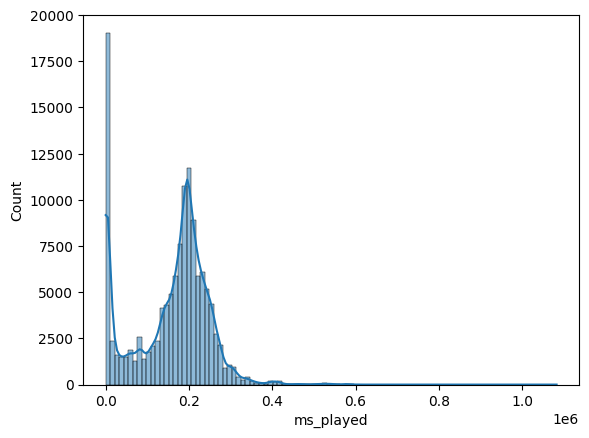

In [8]:
# histogram for ms_played rounded to nearest 1000 (in seconds) to see the distribution
sns.histplot(tracks_df['ms_played'].round(-3), kde = True, bins=100)

In [9]:
display(tracks_df[tracks_df['ms_played'] == 0].sample(5))
print(tracks_df[tracks_df['ms_played'] == 0].shape)

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
8849,2017-07-07T11:55:12Z,"Android OS 7.1.1 API 25 (Sony, E6683)",0,ID,I Don't Know and I Don't Want to Know,In Love With a Ghost,Discography 2015-2016,spotify:track:600wewdSes7BMxXmm6UD7M,NaN,NaN,NaN,fwdbtn,NaN,True,NaN,False,1499428511363,False
128754,2023-11-06T06:09:01Z,android,0,JP,how can i pretend? - Demo,Wasia Project,how can i pretend?,spotify:track:4TKxkBv9vy8MgvHUUFVbH0,NaN,NaN,NaN,fwdbtn,backbtn,True,True,False,1699250939,False
13544,2017-11-06T11:51:33Z,"Android OS 7.1.1 API 25 (Sony, E6683)",0,ID,Castle on the Hill,Ed Sheeran,÷,spotify:track:6PCUP3dWmTjcTtXY02oFdT,NaN,NaN,NaN,appload,NaN,True,NaN,False,1509969061690,False
22856,2018-05-26T13:39:37Z,"Android OS 8.1.0 API 27 (OnePlus, ONEPLUS A5010)",0,JP,Mr. Blue Sky,Electric Light Orchestra,Out of the Blue,spotify:track:2RlgNHKcydI9sayD2Df2xp,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1527341975948,False
24049,2018-06-09T08:30:40Z,"Android OS 8.1.0 API 27 (OnePlus, ONEPLUS A5010)",0,JP,I Just Loved You (feat. Tomppabeats & Oiseaubi...,In Love With a Ghost,Discography 2015-2016,spotify:track:51NwEhU00taacC9npdji7W,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1528533036354,False


(3759, 18)


there are surprisingly a lot of rows with 0 ms_played, might need to check it later

In [10]:
# checking platform unique values
tracks_df['platform'].value_counts(dropna=False)

platform
Android OS 11 API 30 (OnePlus, HD1910)                       21563
android                                                      20780
Android OS 9 API 28 (OnePlus, ONEPLUS A5010)                 15578
Android OS 10 API 29 (OnePlus, ONEPLUS A5010)                15124
Android OS 8.1.0 API 27 (OnePlus, ONEPLUS A5010)             10919
Windows 10 (10.0.17134; x64)                                  7099
Android OS 7.1.1 API 25 (Sony, E6683)                         6847
Windows 10 (10.0.14393; x64)                                  6764
Windows 10 (10.0.18363; x64)                                  6702
Android OS 7.0 API 24 (Sony, E6683)                           4074
windows                                                       3192
Windows 10 (10.0.18362; x64)                                  2858
Android OS 8.0.0 API 26 (OnePlus, ONEPLUS A5010)              1049
Windows 10 (10.0.16299; x64)                                  1011
Android OS 6.0.1 API 23 (Sony, E6683)                

it seems there are just 3 unique values in platform column (android, windows, web_player), we need to handle this value

In [11]:
# checking the unique values in 'skipped' column, including 'NaN'
tracks_df['skipped'].value_counts(dropna=False)

skipped
NaN      105421
False     17475
0.0        3581
True       2065
1.0         851
Name: count, dtype: int64

In [13]:
# show the rows with 'skipped' value of 'NaN'
tracks_df[tracks_df['skipped'].isna()]['reason_end'].value_counts(dropna=False)

reason_end
trackdone                       62298
NaN                             20538
fwdbtn                           9239
backbtn                          4805
logout                           3845
endplay                          3118
remote                            966
unexpected-exit-while-paused      433
unexpected-exit                    64
trackerror                         63
unknown                            52
Name: count, dtype: int64

In [15]:
tracks_df.columns

Index(['ts', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [23]:
tracks_df[tracks_df['skipped'].isna() & tracks_df['reason_end'].isna()] \
[['master_metadata_track_name', 'master_metadata_album_artist_name', 'reason_end', 'skipped', 'ms_played']].sample(5)

,master_metadata_track_name,master_metadata_album_artist_name,reason_end,skipped,ms_played
632,Time Stops,Virtual Riot,NaN,NaN,262725
14612,Interdimensional Portal Leading to a Cute Plac...,In Love With a Ghost,NaN,NaN,148500
993,The Cabin,Ylvis,NaN,NaN,248158
12599,Everything Is Gonna Be Alright,Wyolica,NaN,NaN,234200
15564,Breathe (feat. Danyka Nadeau),Tut Tut Child,NaN,NaN,275121


we also need to handle 'skipped' value as it seems they are just a boolean data type and handle the NaN values

In [20]:
# checking the unique values in 'shuffle' column
tracks_df['shuffle'].value_counts(dropna=False)

shuffle
True     77246
False    52147
Name: count, dtype: int64

In [21]:
# checking the unique values in 'offline' column
tracks_df['offline'].value_counts(dropna=False)

offline
False    123422
True       5971
Name: count, dtype: int64

In [22]:
# checking the unique values in 'incognito_mode' column
tracks_df['incognito_mode'].value_counts(dropna=False)

incognito_mode
False    129076
True        317
Name: count, dtype: int64

shuffle, offline and incognito_mode's value are pretty much complete and has no NaN values

In [ ]:
# checking the unique values in 'reason_start' column
print(tracks_df['reason_start'].value_counts(dropna=False))

reason_start
trackdone     96588
fwdbtn        13695
backbtn        7344
clickrow       5919
appload        4161
remote          690
playbtn         649
trackerror      347
Name: count, dtype: int64


In [ ]:
# checking the unique values in 'reason_end' column
print(tracks_df['reason_end'].value_counts(dropna=False))

reason_end
trackdone                       82153
NaN                             20538
fwdbtn                          11078
backbtn                          5250
logout                           4835
endplay                          3750
remote                           1071
unexpected-exit-while-paused      533
unexpected-exit                    68
trackerror                         63
unknown                            54
Name: count, dtype: int64


based on what we've seen, there are some things that we need to handle:
- drop podcasts related columns [DONE]
- drop offline_timestamp column [DONE]
- ~~drop conn_country column since I think what _platform_ the track was streamed is more important than the _country_ it was streamed~~
- convert 'ts' column into datetime datatype [DONE]
- convert 'ts' based on the conn_country [DONE]
- create 'hour' and 'day_of_week" columns based on the local time
- rename columns with long label (master_metadata_artist_name, etc) into shorter form [DONE]
- trim spotify_track_uri to only track ids [DONE]
- handle _platform_ into three values (web_player, android, windows) [DONE]
- handle _skipped_ into True or False
- handle _skipped_'s NaN value based on _reason end_
- take a look on rows with 0 ms_played 

## Data Preprocessing

### dropping unimportant columns

In [4]:
# dropping the columns that are not useful
tracks_df.drop(columns=['offline_timestamp', 'episode_name', 'episode_show_name', 'spotify_episode_uri'], inplace=True)


### handling 'ts' and 'conn_country' column
there are some things that we need to do here:
- convert 'ts' to datetime
- check unique values of conn_country
- fix the mislabelled rows
- convert 'ts' into its proper timezone

In [5]:
# converting 'ts' to datetime format
tracks_df['ts'] = pd.to_datetime(tracks_df['ts'])

In [6]:
tracks_df['conn_country'].value_counts(dropna=False)

conn_country
JP    103209
ID     24904
SG       614
MY       334
PH       279
CA        32
US        13
ZZ         5
BV         3
Name: count, dtype: int64

it appears that conn_country are mislabelled, because I have never been to CA / US / ZZ / BV.
this mislabelling might caused by some error or because I happened to be on vpn while listening to spotify.
since the quantity of mislabelled rows are not that significant, we can just remove these rows.

but I will see if we can assign them accordingly (since the quantity is also not that many)

In [7]:
# store the date of rows with 'conn_country' value of CA, US, ZZ and BV into a list
mislabelled_conn_country_date = tracks_df[tracks_df['conn_country'].isin(['CA', 'US', 'ZZ', 'BV'])]['ts'].dt.date.unique().tolist()

In [8]:
mislabelled_conn_country_date

[datetime.date(2017, 8, 25),
 datetime.date(2017, 11, 6),
 datetime.date(2018, 7, 27),
 datetime.date(2019, 10, 22),
 datetime.date(2021, 8, 31),
 datetime.date(2021, 9, 1),
 datetime.date(2021, 11, 28),
 datetime.date(2021, 12, 2),
 datetime.date(2022, 6, 17),
 datetime.date(2022, 7, 17),
 datetime.date(2022, 8, 25),
 datetime.date(2022, 12, 10),
 datetime.date(2023, 1, 19),
 datetime.date(2023, 1, 29)]

In [9]:
# show the unique value of conn_country on each day in the list and store the most frequent value into a dictionary of date:country
conn_country_dict = {}
for date in mislabelled_conn_country_date:
    conn_country_dict[date] = tracks_df[tracks_df['ts'].dt.date == date]['conn_country'].value_counts().index[0]

In [10]:
conn_country_dict

{datetime.date(2017, 8, 25): 'ID',
 datetime.date(2017, 11, 6): 'ID',
 datetime.date(2018, 7, 27): 'JP',
 datetime.date(2019, 10, 22): 'JP',
 datetime.date(2021, 8, 31): 'JP',
 datetime.date(2021, 9, 1): 'JP',
 datetime.date(2021, 11, 28): 'JP',
 datetime.date(2021, 12, 2): 'JP',
 datetime.date(2022, 6, 17): 'JP',
 datetime.date(2022, 7, 17): 'ID',
 datetime.date(2022, 8, 25): 'JP',
 datetime.date(2022, 12, 10): 'JP',
 datetime.date(2023, 1, 19): 'JP',
 datetime.date(2023, 1, 29): 'JP'}

In [11]:
# replace the mislabelled conn_country with the correct country
tracks_df['conn_country'] = tracks_df.apply(lambda x: conn_country_dict[x['ts'].date()] if x['conn_country'] in ['CA', 'US', 'ZZ', 'BV'] else x['conn_country'], axis=1)

In [12]:
# check the unique values in 'conn_country' column again
tracks_df['conn_country'].value_counts(dropna=False)

conn_country
JP    103256
ID     24910
SG       614
MY       334
PH       279
Name: count, dtype: int64

In [13]:
import pytz

In [14]:
# Function to convert timezone and extract hour and day of week
def convert_and_extract(row):
    # Get the appropriate timezone
    country_tz = pytz.country_timezones(row['conn_country'])[0]
    local_time = row['ts'].tz_convert(pytz.timezone(country_tz))
    
    # Extract hour and day of week
    hour = local_time.hour
    day_of_week = local_time.strftime('%A')
    
    return pd.Series([local_time, hour, day_of_week])


In [15]:
# Apply the function to extract local time, hour, and day of week
tracks_df[['ts_local', 'hour', 'day_of_week']] = tracks_df.apply(convert_and_extract, axis=1)

In [16]:
# show 5 rows for each conn_country
for country in tracks_df['conn_country'].unique():
    print(country)
    display(tracks_df[tracks_df['conn_country'] == country][['ts', 'ts_local', 'hour', 'day_of_week', 'conn_country']].sample(5))

ID


,ts,ts_local,hour,day_of_week,conn_country
43377,2019-04-17 14:14:56+00:00,2019-04-17 21:14:56+07:00,21,Wednesday,ID
8463,2017-06-30 12:17:06+00:00,2017-06-30 19:17:06+07:00,19,Friday,ID
9708,2017-07-27 18:01:52+00:00,2017-07-28 01:01:52+07:00,1,Friday,ID
13004,2017-10-25 06:33:34+00:00,2017-10-25 13:33:34+07:00,13,Wednesday,ID
17767,2018-01-05 14:37:43+00:00,2018-01-05 21:37:43+07:00,21,Friday,ID


JP


,ts,ts_local,hour,day_of_week,conn_country
112679,2023-02-26 22:41:05+00:00,2023-02-27 07:41:05+09:00,7,Monday,JP
66289,2020-09-19 01:30:28+00:00,2020-09-19 10:30:28+09:00,10,Saturday,JP
45816,2019-06-03 05:35:44+00:00,2019-06-03 14:35:44+09:00,14,Monday,JP
90074,2022-01-02 09:56:49+00:00,2022-01-02 18:56:49+09:00,18,Sunday,JP
59713,2020-06-16 08:45:50+00:00,2020-06-16 17:45:50+09:00,17,Tuesday,JP


MY


,ts,ts_local,hour,day_of_week,conn_country
121472,2023-07-03 11:41:42+00:00,2023-07-03 19:41:42+08:00,19,Monday,MY
121453,2023-07-03 10:35:01+00:00,2023-07-03 18:35:01+08:00,18,Monday,MY
43841,2019-04-28 04:34:46+00:00,2019-04-28 12:34:46+08:00,12,Sunday,MY
119931,2023-06-15 08:47:58+00:00,2023-06-15 16:47:58+08:00,16,Thursday,MY
43825,2019-04-28 03:07:08+00:00,2019-04-28 11:07:08+08:00,11,Sunday,MY


SG


,ts,ts_local,hour,day_of_week,conn_country
83344,2021-09-21 10:57:14+00:00,2021-09-21 18:57:14+08:00,18,Tuesday,SG
121192,2023-06-27 18:10:17+00:00,2023-06-28 02:10:17+08:00,2,Wednesday,SG
111001,2023-01-30 06:54:55+00:00,2023-01-30 14:54:55+08:00,14,Monday,SG
111116,2023-01-30 23:38:34+00:00,2023-01-31 07:38:34+08:00,7,Tuesday,SG
104852,2022-10-06 16:00:29+00:00,2022-10-07 00:00:29+08:00,0,Friday,SG


PH


,ts,ts_local,hour,day_of_week,conn_country
97331,2022-06-19 11:55:55+00:00,2022-06-19 19:55:55+08:00,19,Sunday,PH
99810,2022-07-20 23:26:05+00:00,2022-07-21 07:26:05+08:00,7,Thursday,PH
99859,2022-07-20 23:26:05+00:00,2022-07-21 07:26:05+08:00,7,Thursday,PH
99788,2022-07-20 23:26:05+00:00,2022-07-21 07:26:05+08:00,7,Thursday,PH
99905,2022-07-20 23:26:05+00:00,2022-07-21 07:26:05+08:00,7,Thursday,PH


### renaming columns with long label

In [17]:
# renaming master_metadata_track_name, master_metadata_album_artist_name, and master_metadata_album_album_name into track_name, artist_name, and album_name
tracks_df.rename(columns={'master_metadata_track_name':'track_name', 'master_metadata_album_artist_name':'artist_name', 'master_metadata_album_album_name':'album_name'}, inplace=True)

In [18]:
tracks_df.sample(5)

,ts,platform,ms_played,conn_country,track_name,artist_name,album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,ts_local,hour,day_of_week
27095,2018-07-23 13:46:55+00:00,Windows 10 (10.0.17134; x64),5000,JP,Mr. Blue Sky,Electric Light Orchestra,Out of the Blue,spotify:track:2RlgNHKcydI9sayD2Df2xp,clickrow,endplay,False,NaN,False,False,2018-07-23 22:46:55+09:00,22,Monday
110575,2023-01-28 01:50:42+00:00,android,3280,JP,Paper Mache World,Matilda Mann,Because I Wanted You to Know,spotify:track:3Maqlu2aPlU8NluW19O8JD,clickrow,endplay,True,True,False,False,2023-01-28 10:50:42+09:00,10,Saturday
2038,2017-03-05 11:48:30+00:00,"Android OS 7.0 API 24 (Sony, E6683)",166373,ID,I'm Beginning To Think You Prefer Beverly Hill...,Fight Like Apes,Fight Like Apes and The Mystery of The Golden ...,spotify:track:0SxZpiF1BfbLiKJAamelYz,trackdone,NaN,False,NaN,False,False,2017-03-05 18:48:30+07:00,18,Sunday
4138,2017-04-10 16:01:42+00:00,"Android OS 7.0 API 24 (Sony, E6683)",801,ID,Find the Light (feat. Harley Holmes),audalanche,Find the Light (feat. Harley Holmes),spotify:track:7i0Pa4mJTJVIMw7Vy3FFUi,fwdbtn,NaN,True,NaN,False,False,2017-04-10 23:01:42+07:00,23,Monday
49903,2019-09-08 12:34:35+00:00,"Android OS 9 API 28 (OnePlus, ONEPLUS A5010)",134220,JP,Losers,kobasolo,KOBASOLO,spotify:track:1oE5TZsUi2GNphLY8D3SUB,trackdone,logout,False,NaN,False,False,2019-09-08 21:34:35+09:00,21,Sunday


### handling platform columns

In [19]:
# trim the platform values to only the first word and make it lowercase
tracks_df['platform'] = tracks_df['platform'].str.split().str[0].str.lower()

# replace 'partner' value in platform column with 'web_player'
tracks_df['platform'].replace('partner', 'web_player', inplace=True)

C:\Users\Kim\AppData\Local\Temp\ipykernel_26216\3275832675.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tracks_df['platform'].replace('partner', 'web_player', inplace=True)


In [20]:
tracks_df['platform'].value_counts()

platform
android       97301
windows       32015
web_player       77
Name: count, dtype: int64

### handling spotify_track_uri to only track_id

In [21]:
# trim spotify_track_uri to only the track id and rename the column into track_id
tracks_df['spotify_track_uri'] = tracks_df['spotify_track_uri'].str.split(':').str[2]
tracks_df.rename(columns={'spotify_track_uri':'track_id'}, inplace=True)

In [22]:
tracks_df.sample(5)

,ts,platform,ms_played,conn_country,track_name,artist_name,album_name,track_id,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,ts_local,hour,day_of_week
99065,2022-07-11 09:34:10+00:00,android,158962,ID,Why Don't U Love Me,Wasia Project,Why Don't U Love Me,0w03oXakqLwdERsRzpMprA,trackdone,trackdone,False,NaN,False,False,2022-07-11 16:34:10+07:00,16,Monday
118196,2023-05-29 05:10:36+00:00,windows,248498,JP,"Harder, Better, Faster, Stronger",Pomplamoose,Best of 2019,1s2LrYFnrFdG2LCtyvwBmv,trackdone,trackdone,True,False,False,False,2023-05-29 14:10:36+09:00,14,Monday
79599,2021-07-08 05:33:23+00:00,android,254306,JP,そばかす,JUDY AND MARY,Complete Best Album Fresh,6YtmVjtDWDbac5tcto0BAn,trackdone,trackdone,True,NaN,False,False,2021-07-08 14:33:23+09:00,14,Thursday
80009,2021-07-18 09:18:56+00:00,android,541305,JP,God of the Dead,Darren Korb,Hades: Original Soundtrack,65pRSbXmrkdE1HzzIkeLPH,trackdone,trackdone,True,NaN,False,False,2021-07-18 18:18:56+09:00,18,Sunday
31541,2018-10-08 06:40:40+00:00,android,224349,JP,Somebody's Someone,Daphne Willis,Somebody's Someone,4Rwfg1x0g3cd5UwuK2UVLa,trackdone,trackdone,True,NaN,True,False,2018-10-08 15:40:40+09:00,15,Monday


In [23]:
# let's save the current tracks_df into a new csv file
tracks_df.to_csv('datasets/tracks_df_cleaned.csv', index=False)

### handling 'skipped' column (not yet finished)
there are few things that we need to do here:
- turn the values into True/False to make it uniform with other columns
- assign NaN rows with its correct value as many as possible using reason_end and track's duration 

In [53]:
tracks_df['skipped'].value_counts(dropna=False)

skipped
NaN      105421
False     17475
0.0        3581
True       2065
1.0         851
Name: count, dtype: int64

In [54]:
tracks_df['skipped'] = tracks_df['skipped'].replace({'False': False, '0.0': False, 'True': True, '1.0': True})
tracks_df['skipped'] = tracks_df['skipped'].astype('boolean') #so that it can store True, False, and NaN


In [55]:
tracks_df['skipped'].value_counts(dropna=False)

skipped
<NA>     105421
False     21056
True       2916
Name: count, dtype: Int64

In [61]:
# first, let's see the combination of 'skipped' and 'reason_end' values, including 'NaN'
tracks_df.groupby(['skipped', 'reason_end'], dropna=False).size().unstack()

reason_end,backbtn,endplay,fwdbtn,logout,remote,trackdone,trackerror,unexpected-exit,unexpected-exit-while-paused,unknown,NaN
skipped,,,,,,,,,,,
False,NaN,NaN,NaN,990.0,105.0,19855.0,NaN,4.0,100.0,2.0,NaN
True,445.0,632.0,1839.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
<NA>,4805.0,3118.0,9239.0,3845.0,966.0,62298.0,63.0,64.0,433.0,52.0,20538.0


based on the table above, we can see that:
- Skipped == False happens mostly when the reason_end of the track is either trackdone, or the user exit the apps
- Skipped == True happens when the user pressed the backbutton, endplay or forwardbutton to either navigate to other song, pause or replay the song (pressing backbutton here means that the track will be replayed from the beginning)
based on this finding, we can fill a part of NaN value of the 'skipped' columns

In [62]:
# Define a function to fill NaN in 'skipped' based on 'reason_end'
def fill_skipped(row):
    if pd.isna(row['skipped']):
        if row['reason_end'] in ['fwdbtn', 'backbtn', 'endplay']:
            return True 
        elif row['reason_end'] in ['logout', 'remote', 'trackdone', 'trackerror', 'unexpected-exit', 'unexpected-exit-while-paused']:
            return False
    return row['skipped'] # Return the original value if not NaN or reason_end is not in the specified list

# Apply the function row by row
tracks_df['skipped'] = tracks_df.apply(fill_skipped, axis=1)


In [63]:
tracks_df['skipped'].value_counts(dropna=False)

skipped
False    88725
<NA>     20590
True     20078
Name: count, dtype: int64

great, we are able to cut down some NaN values in skipped, but we are not done yet.
next, I would like to see how the 'ms_played' of the NaN rows when compared to the track duration (combining from track_info data)

In [56]:
# get track_info to get each track information
track_info = pd.read_csv('datasets/tracks_info_df.csv')
# let's keep the columns that we need only
track_info = track_info[['track_id', 'duration_ms']]

In [69]:
display(tracks_df.sample(5))
display(track_info.sample(5))

,ts,platform,ms_played,conn_country,track_name,artist_name,album_name,track_id,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,ts_local,hour,day_of_week
14454,2017-11-21 15:28:09+00:00,windows,148500,ID,Interdimensional Portal Leading to a Cute Plac...,In Love With a Ghost,Interdimensional Portal Leading to a Cute Plac...,1HW1arhhmKY3jI7QyARvsf,trackdone,NaN,True,<NA>,False,False,2017-11-21 22:28:09+07:00,22,Tuesday
33017,2018-10-28 03:58:01+00:00,android,84705,JP,feeling empty because there's no more spaghetti,In Love With a Ghost,gay story,1YGmfMC5FqaYZqa8RioLqr,trackdone,trackdone,True,False,True,False,2018-10-28 12:58:01+09:00,12,Sunday
6395,2017-05-15 04:11:43+00:00,android,230243,ID,"I Was Feeling Down, I Found a Nice Witch and W...",In Love With a Ghost,Healing,2Csg0XMPdNmHLozWODtsQq,trackdone,NaN,True,<NA>,False,False,2017-05-15 11:11:43+07:00,11,Monday
13838,2017-11-11 06:12:45+00:00,windows,244960,ID,Closer,The Chainsmokers,Closer,7BKLCZ1jbUBVqRi2FVlTVw,trackdone,NaN,True,<NA>,False,False,2017-11-11 13:12:45+07:00,13,Saturday
122700,2023-07-18 02:08:17+00:00,android,192248,JP,La La La,Us The Duo,Up Until Now,5ahstBPUDe1yol0HYT2WRQ,backbtn,trackdone,True,False,False,False,2023-07-18 11:08:17+09:00,11,Tuesday


,track_id,duration_ms
4135,2ssjMn6LLPJl3dzF7bHna0,116923
4516,0xmWQKzc5m9rLv2ucDWxwD,236426
5111,3geMf9Ada0dHExUvSZKi5S,211480
3894,7FQwu9yL27zkMIeiHvxWr5,191135
3751,2UUVwDVZYR5StS7Si0SxrP,198389


In [70]:
# get the duration from track_info and merge it with tracks_df based on track_id
tracks_df = tracks_df.merge(track_info, on='track_id', how='left')

In [78]:
# store a label for a shorter syntax
skipped_labels = ['track_id', 'reason_start', 'reason_end', 'skipped', 'ms_played', 'duration_ms']

In [83]:
tracks_df[(tracks_df['reason_end'] == 'trackdone')
          & (tracks_df['ms_played'] < tracks_df['duration_ms'])] \
            [skipped_labels]

,track_id,reason_start,reason_end,skipped,ms_played,duration_ms
40,1x59YtDtw7jPZTxqNYmhq2,appload,trackdone,False,394449,417314
20613,0XodGPHuylQUaoe1Gba2jF,appload,trackdone,False,4263,185177
20644,2ju2QeVgFtJM3gLQZKj6i9,appload,trackdone,False,336762,336782
20651,2ju2QeVgFtJM3gLQZKj6i9,appload,trackdone,False,279623,336782
20685,2ju2QeVgFtJM3gLQZKj6i9,appload,trackdone,False,294595,336782
...,...,...,...,...,...,...
128080,7yoNS78wCq61PqbfBggqzo,appload,trackdone,False,107075,313539
128574,3BmaFHt6q91CmMrA7fLLRC,appload,trackdone,False,138771,256945
128598,3BmaFHt6q91CmMrA7fLLRC,appload,trackdone,False,255169,256945
128623,3BmaFHt6q91CmMrA7fLLRC,appload,trackdone,False,246249,256945


In [92]:
# create a new column of difference between duration_ms and ms_played
tracks_df['ms_played_diff'] = tracks_df['ms_played'] - tracks_df['duration_ms']

In [97]:
tracks_df[(tracks_df['ms_played_diff'] < 0) &
          (tracks_df['reason_end'].isna())] \
            [skipped_labels + ['ms_played_diff']].sort_values('ms_played_diff', ascending=False).head(50)

,track_id,reason_start,reason_end,skipped,ms_played,duration_ms,ms_played_diff
10504,3EmmCZoqpWOTY1g2GBwJoR,clickrow,NaN,<NA>,198712,198774,-62
3917,0KKkJNfGyhkQ5aFogxQAPU,trackdone,NaN,<NA>,206492,206693,-201
13188,2Csg0XMPdNmHLozWODtsQq,appload,NaN,<NA>,229933,230243,-310
14568,1HW1arhhmKY3jI7QyARvsf,appload,NaN,<NA>,148180,148500,-320
2668,6gpcs5eMhJwax4mIfKDYQk,trackdone,NaN,<NA>,230393,230813,-420
2408,6gpcs5eMhJwax4mIfKDYQk,trackdone,NaN,<NA>,230393,230813,-420
16754,7zvKFw17XyoBUx9mHiwzPy,trackdone,NaN,<NA>,195739,196173,-434
17717,40cPkRjw5aLQIOjaqgUVnB,appload,NaN,<NA>,306494,306985,-491
13949,2QbFClFyhMMtiurUjuQlAe,appload,NaN,<NA>,213625,214265,-640
10548,5cvbog6wen3r3bBbcwL16U,trackdone,NaN,<NA>,198857,199603,-746


In [81]:
tracks_df[tracks_df['reason_end'] == 'trackdone'][skipped_labels].sample(10)

,track_id,reason_start,reason_end,skipped,ms_played,duration_ms
77194,1Bg8saB3l6mLX327oZUwMv,trackdone,trackdone,False,196767,196779
103948,1Jb8fejyUddXtl2JKAEFmQ,trackdone,trackdone,False,214754,214754
72659,4xGoUBwbPk9IEIIDvJfGGg,trackdone,trackdone,False,157618,157626
39999,2ph6BRhGcUzc2W9wIulG5k,trackdone,trackdone,False,230586,230586
51940,5jdwsOK5fXS3cWAuVccy0z,trackdone,trackdone,False,189397,189397
87355,2Q3YTEuU9YkEaxbocbSIju,trackdone,trackdone,False,152682,152682
94010,3u5oNyjZGEP5Ntj0b29M8V,trackdone,trackdone,False,247479,247488
49873,7EYR17bHR2ZkJ8o2mKSJDU,trackdone,trackdone,False,134613,134613
112493,6CT9rlhE55gX3MaDznjWt7,trackdone,trackdone,False,180863,180863
100040,64dZzOERFpgQBIqBkOpvQr,fwdbtn,trackdone,False,200224,200224


In [77]:
tracks_df[tracks_df['ms_played'] == tracks_df['duration_ms']][['track_id', 'reason_start', 'reason_end', 'skipped', 'ms_played', 'duration_ms']].sample(50)

,track_id,reason_start,reason_end,skipped,ms_played,duration_ms
15562,6SFV8lSwWqAOtitaFzEoaF,trackdone,NaN,<NA>,171182,171182
50144,53I0J03P282PSumZukDHsX,trackdone,trackdone,False,79786,79786
110677,5jxjLdZXCqZlAOCC1OHOmc,trackdone,trackdone,False,189506,189506
59720,4BGfM7Faj0dyEnSuaOw67j,trackdone,trackdone,False,139691,139691
127505,2Y6FEOBXOQ0NTVzl0DGDJk,trackdone,trackdone,False,145893,145893
109996,04ITn1QsfKxIC16eoqMz0B,trackdone,trackdone,False,200803,200803
102349,3ZiuxcBeRanTjfHzVBuuQe,trackdone,trackdone,False,180952,180952
43366,55bmTrFYialBaZacYVejWw,trackdone,trackdone,False,211093,211093
66776,0MjXRAftpVBuNGYsNV1obJ,trackdone,trackdone,False,273126,273126
117210,2pIVtQtYOsSptesL6eTMms,trackdone,trackdone,False,174000,174000


## saving the processed data

In [ ]:
tracks_df.sample(5)

,ts,platform,ms_played,conn_country,track_name,artist_name,album_name,track_id,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,ts_local
22798,2018-05-26 12:48:56+00:00,android,78720,JP,Good Morning Qt,In Love With a Ghost,Discography 2015-2016,3HO8tYJGwNdOlctYzGhzkH,trackdone,trackdone,1,NaN,0,0,2018-05-26 21:48:56+09:00
19939,2018-03-18 16:11:33+00:00,windows,223064,ID,Dragon Night,SEKAI NO OWARI,Dragon Night,24lfxhAGqFbxMWCPg23wOV,fwdbtn,NaN,1,NaN,0,0,2018-03-18 23:11:33+07:00
37337,2019-01-01 18:03:25+00:00,android,133764,JP,Baby,Bishop Briggs,Baby,21vwWfS6qvxh8TN3lgHvZr,appload,trackdone,1,NaN,0,0,2019-01-02 03:03:25+09:00
76172,2021-04-18 09:11:39+00:00,android,210917,JP,Us Against the World,Daniela Andrade,"Covers, Vol. 1",6bIOb9jMS0Fh01zTdQYfdt,trackdone,trackdone,0,NaN,0,0,2021-04-18 18:11:39+09:00
98653,2022-07-03 03:25:16+00:00,android,187185,ID,Knock Me Off My Feet,SOAK,Grim Town,3adNtom9Dn2NXmgHf0OwZR,trackdone,trackdone,0,NaN,0,0,2022-07-03 10:25:16+07:00


In [ ]:
#save tracks_df into csv
tracks_df.to_csv('datasets/tracks_df_processed.csv', index=False)

# Lyrics data

## Data Cleaning/Preprocessing

In [3]:
# let's load the lyrics data that we have scraped from Genius (through LyricsGenius)
lyrics_df = pd.read_csv('datasets/lyrics_data.csv')
lyrics_df.rename(columns={'Unnamed: 0':'track_id'}, inplace=True)

In [4]:
lyrics_df.isna().sum()

track_id             0
title_genius      1574
artist_genius     1574
title_spotify        0
artist_spotify       0
lyrics            1574
dtype: int64

In [5]:
# remove rows with NaN in lyrics column
lyrics_df.dropna(subset=['lyrics'], inplace=True)

In [6]:
# rows mismatched artist_genius and artist_spotify
mismatched_artists = lyrics_df[lyrics_df['artist_genius'] != lyrics_df['artist_spotify']]
display(mismatched_artists.head(5))
display(mismatched_artists.shape)

,track_id,title_genius,artist_genius,title_spotify,artist_spotify,lyrics
7,1ip1SN4tWX0qMgE1KgIF52,Collision Mix,Monstercat,Calling Out (feat. KG & Skyelle),MUZZ,3 ContributorsCollision Mix Lyrics00:00TimeSna...
9,1uy20tUwglZ4hapeq50jSL,Essays of Michel de Montaigne (Chap. 2.12),Michel de Montaigne,Saving My Love - Stfu Mix,Twin Pack,4 ContributorsEssays of Michel de Montaigne (C...
11,2nYxM6Di7mhBTv26K887fQ,Drinks Up,G-Eazy,Sky,Goose house,7 ContributorsDrinks Up Lyrics[Chorus]\r\nGot ...
13,6mPGkCjfAZ1PR52RBxXumL,En Privado,Mike Oxlong,”JUST FRIENDS”?,Goose house,1 ContributorEn Privado Lyrics[Intro: RJ Ghost...
14,167PWPhEUGgTXuRkRCCCSD,The Recession Lesson,"Khushal Kalidindi, Ashwin Kumar","Fly High, So High",Goose house,2 ContributorsThe Recession Lesson Lyrics[Vers...


(1837, 6)

In [7]:
# rows where artist_genius and artist_spotify are different, but one is a substring of the other
within_substring = mismatched_artists.apply(lambda row: row['artist_spotify'].lower() in row['artist_genius'].lower() 
                            or row['artist_genius'].lower() in row['artist_spotify'].lower(), axis=1)
mismatched_artists[within_substring].shape

(542, 6)

In [8]:
mismatched_artists[within_substring][['artist_genius', 'artist_spotify']].sample(5)

,artist_genius,artist_spotify
855,ゆのみ (Yunomi),Yunomi
4655,​ella jane,ella jane
5061,Stealth (UK),Stealth
4799,beabadoobee & Oscar Lang,beabadoobee
2727,​sad boy with a laptop,sad boy with a laptop


In [9]:
# get the rows with matched artist_genius and artist_spotify, and the rows in within_substring
correct_artist_lyrics = lyrics_df[(lyrics_df['artist_genius'] == lyrics_df['artist_spotify']) | within_substring]

In [10]:
display(correct_artist_lyrics.sample(5))
display(correct_artist_lyrics.shape)

,track_id,title_genius,artist_genius,title_spotify,artist_spotify,lyrics
4882,1LIaXS82jVxkZQdXbfM5QH,Astronaut Kids,Hotel Fiction,Astronaut Kids,Hotel Fiction,3 ContributorsAstronaut Kids Lyrics[Verse 1]\n...
4181,6oPbtiso9fJpfJ3Z6hqnX9,眠りの森 (Nemuri no Mori),Aimer,眠りの森,Aimer,1 ContributorTranslationsRomanization眠りの森 (Nem...
4825,6huaXgODnR4m9rfVhGqsGf,Allie,NoSo,Allie,NoSo,3 ContributorsAllie LyricsPaint\nBlue stars on...
1025,0DW3HWn2qCPc5e0Chh8cOU,Can’t Forget You,San Holo,Can't Forget You (feat. The Nicholas),San Holo,6 ContributorsCan’t Forget You Lyrics[Verse 1]...
4886,3BmaFHt6q91CmMrA7fLLRC,Petals on the Moon,Wasia Project,Petals on the Moon,Wasia Project,8 ContributorsPetals on the Moon Lyrics[Verse ...


(2374, 6)

In [11]:
# let's see one of the lyrics
correct_artist_lyrics.iloc[47]['lyrics']

"13 ContributorsTranslationsRomanization\u200bninelie Lyrics[Aimer「ninelie (feat. chelly from EGOIST)」歌詞]\n\n[Verse 1: Aimer]\n君を繋ぐ空の星が\n一つ音を立てても\nどれも同じ雨に濡れた\n夢ばかり 乾くだけの光\n\n[Pre-Chorus: chelly, chelly & Aimer]\n相手をなぞる答えに疲れた\n繰り返す陽の無い夜明けに崩れた朝\n\n[Chorus: Aimer, chelly]\n捕まえた daydream\n出遅れたストーリーと\n栄光がどこへ叫び唱えても\n荒れたトンネル\n声もくぐれない\nだからサイレンス 灯すためと\n\n[Verse 2: chelly]\n外とパズルのようにハマる\nピースが必要としても\n影もない偽りと同じだ\n捨て去られ並ぶだけの賞\nSee Aimer LiveGet tickets as low as $102You might also like[Pre-Chorus: Aimer, Aimer & chelly]\n箱の中に 揃えた苛立\n順番待ちさらし 誤魔化しのゴール\n\n[Chorus: chelly, Aimer]\nDon't be above your daydream\n角が取れた vision\n君の夢が横で外れても\n僕は歌い\n橋をかけよう\nだからサイレンス 鳴らすためと\n\n[Bridge: Aimer]\nどこまでも片側に沿ったリズム\n過ぎた町並みは終わりの愛と遠くへ\n伝えれない歪みかけのイメージに\n目が覚めた抵抗 型落ちの衝動\n\n[Chorus: All]\n砕けた cry and dream\n扉だけの理想\n街が雑音に溺れ はしゃいでも\n僕は歌い\n舵を捨てよう\nだからサイレンス 響くためと\n\n[Outro: All]\nDon't be afraid, daybreak has come\nDon't be afraid, daybreak has come\nDon't be afraid, daybreak has come\nDon't be afraid, daybreak has come1Embed"

since the lyrics is scraped from Genius, the data isn't that clean, it has some garbage information like 'contributors', etc that needs to be cleaned.

In [35]:
import re
def clean_lyrics(lyrics):
    # Regex to remove unwanted patterns
    unwanted_patterns = [
        r"Translations?.*",                       # translations
        r"Contributors?.*",                        # contributors
        r"Romanization.*",                         # romanization
        r"(\[.*?\])",                              # brackets and their contents
        r"(lyrics provided by genius|embed|you might also like)",  # footer/random text
        r"\d+",                                    # numbers
    ]
    
    # Remove unwanted patterns
    for pattern in unwanted_patterns:
        lyrics = re.sub(pattern, '', lyrics, flags=re.IGNORECASE)
    
    # Remove specific unwanted characters and excessive whitespace
    lyrics = re.sub(r'[\r\t]+', ' ', lyrics)  # Replace carriage returns, and tabs with a space
    lyrics = re.sub(r'\n+', '\n', lyrics) # Replace multiple newlines with a single newline
    lyrics = lyrics.strip() # Remove leading and trailing whitespace
    
    return lyrics

In [109]:
correct_artist_lyrics['lyrics'].apply(clean_lyrics).iloc[4]

'遠く離れた場所にいる時も 僕らの声が届きますように 迷ったときはオトノナルホウヘ→ 笑う門にはちゃんと (ちゃんと) 福はやって来るから (Yeah, yeah!) 泣いて腫らしたその目だって ほら笑顔が似合う (Ah-ah-ah-ah) 息が詰まるこんな世の中で 出会えたんだ (Oh, oh, oh) 色とりどりの世界を一緒に見に (ホイ!) 行こう 頑張り屋の君だから 壁にもぶつかるでしょう でももう平気 ひとりでは背負わないでいいんだよ (Yeah, yeah, yeah, yeah) 君が笑えば 僕も笑うから (Yeah, yeah!) めぐりめぐりまた違う誰かのとこまで (Fu!) 遠く離れた場所にいる時も 僕らの声が届きますように 迷ったときはオトノナルホウヘ→ (One, two, three, go!) 季節変わり新しい日々 賑やかな駅のホームにひとり 上がり (上がり) 下がり (下がり) 慣れない環境ココロ戸惑う (もういっちょ!) 早歩きする街を うまく歩けないけど ビルの隙間にはほら 今日も空は広がっている 誰にも見せない涙 拭いて歩いてゆけ 風が動き出す 髪がなびく 未来がはじまる (Yeah, yeah, yeah, yeah) 君が歌えば 僕も歌うから (Yeah, yeah!) うまくなくてもいい 君の声を聞かせて (Fu!) ひとりひとりの音は違うから (Yeah, yeah!) ヒカリが届かなくなったって君を見つけるよ (Oh yeah!!) 君が笑えば 僕も笑うから (Yeah, yeah!) めぐりめぐりまた違う誰かのとこまで (飛ばせ) 遠く離れた場所にいる時も 僕らの声が届きますように 迷ったときはオトノナルホウヘ→ オトノナルホウヘ→'

In [36]:
correct_artist_lyrics['cleaned_lyrics'] = correct_artist_lyrics['lyrics'].apply(clean_lyrics)

C:\Users\nazhi\AppData\Local\Temp\ipykernel_4772\692614525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_artist_lyrics['cleaned_lyrics'] = correct_artist_lyrics['lyrics'].apply(clean_lyrics)


In [37]:
# let's see one of the lyrics
correct_artist_lyrics.iloc[58]['lyrics']

"10 ContributorsCall On Me (Ryan Riback Remix) Lyrics[Verse 1]\nWhen you're low\nAnd your knees can't rise\nYou feel helpless\nAnd you're looking to the sky\nSome people would say\nTo accept defeat\nWell, if this is fate then we'll find a way to cheat\n\n[Pre-Chorus]\nCause, oh, oh, oh, oh, we'll say a little prayer\nBut, oh, oh, oh, oh, if the answer isn't fair\n\n[Chorus]\nYou know you can call on me\nWhen you need somebody\nYou know you can call on me\nWhen you can't stop the tears from falling down, d-down\nYou know you can call on me\nCall on me, darling\nYou know you can call on me\nYou can’t stop the tears from falling down\n\n[Verse 2]\nWhen you're weary\nAnd the road is dark\nAnd I'll guide you\nWith the beating of my heart\nAnd if the cavalry\nAnd the help don't come\nWell, then we'll find a way\nTo dodge a smoking gun\nYou might also like[Pre-Chorus]\nCause, oh, oh, oh, oh, we'll say a little prayer\nBut, oh, oh, oh, oh, if the answer isn't fair (then call on me)\n\n[Chorus]

In [39]:
# let's see one of the lyrics
correct_artist_lyrics.iloc[58]['cleaned_lyrics']

"When you're low\nAnd your knees can't rise\nYou feel helpless\nAnd you're looking to the sky\nSome people would say\nTo accept defeat\nWell, if this is fate then we'll find a way to cheat\nCause, oh, oh, oh, oh, we'll say a little prayer\nBut, oh, oh, oh, oh, if the answer isn't fair\nYou know you can call on me\nWhen you need somebody\nYou know you can call on me\nWhen you can't stop the tears from falling down, d-down\nYou know you can call on me\nCall on me, darling\nYou know you can call on me\nYou can’t stop the tears from falling down\nWhen you're weary\nAnd the road is dark\nAnd I'll guide you\nWith the beating of my heart\nAnd if the cavalry\nAnd the help don't come\nWell, then we'll find a way\nTo dodge a smoking gun\nCause, oh, oh, oh, oh, we'll say a little prayer\nBut, oh, oh, oh, oh, if the answer isn't fair (then call on me)\nYou know you can call on me\nWhen you need somebody\nYou know you can call on me\nWhen you can't stop the tears from falling down, d-down\nYou know

In [41]:
# I kinda want to filter off some lyrics that are too short
def count_words_and_sentences(lyrics):
    sentences = lyrics.split('\n')
    sentences = [sentence for sentence in sentences if sentence.strip()]
    num_sentences = len(sentences)
    
    words = re.findall(r'\b\w+\b', lyrics)
    num_words = len(words)
    
    return num_words, num_sentences

In [42]:
correct_artist_lyrics[['num_words', 'num_sentences']] = correct_artist_lyrics['cleaned_lyrics'].apply(count_words_and_sentences).apply(pd.Series)

C:\Users\nazhi\AppData\Local\Temp\ipykernel_4772\2534676162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_artist_lyrics[['num_words', 'num_sentences']] = correct_artist_lyrics['cleaned_lyrics'].apply(count_words_and_sentences).apply(pd.Series)
C:\Users\nazhi\AppData\Local\Temp\ipykernel_4772\2534676162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_artist_lyrics[['num_words', 'num_sentences']] = correct_artist_lyrics['cleaned_lyrics'].apply(count_words_and_sentences).apply(pd.Seri

In [ ]:
correct_artist_lyrics.sort_values('num_words', ascending=True).head(100)

In [46]:
# let's save this for now
correct_artist_lyrics.to_csv('datasets/lyrics_data_cleaned.csv', index=False)

## Emotion recognition of the lyrics data

In [80]:
# load the cleaned lyrics data
cleaned_lyrics = pd.read_csv('datasets/lyrics_data_cleaned.csv')
print(cleaned_lyrics.columns)
print(cleaned_lyrics.shape)

Index(['track_id', 'title_genius', 'artist_genius', 'title_spotify',
       'artist_spotify', 'lyrics', 'cleaned_lyrics', 'num_words',
       'num_sentences'],
      dtype='object')
(2374, 9)


In [81]:
# let's get only lyrics with more than 20 words (since if the lyrics is less than 20 words, there aren't much information for the transformer to use)
# and also get only the columns that we need
song_lyrics = cleaned_lyrics[cleaned_lyrics['num_words'] > 20][['track_id', 'cleaned_lyrics']]

In [82]:
song_lyrics.sample(5)

,track_id,cleaned_lyrics
704,2GgBtBIiCiHtSFeYkUC6LU,"When I'm with you, babe\nI think you know what..."
1122,4w2sOKmotzKsdGDLHic94B,I wanna smash your fears\nAnd get drunken off ...
635,2Ig68x4WLnTHjaxIKfwz3H,I'm going outside\nOut-out-out-out-out-out-out...
2320,0tMMPZEt6Gyrl9FI8zSicm,I've never known someone like you\nTangled in ...
1659,7B3z0ySL9Rr0XvZEAjWZzM,I think we could do it if we tried\nIf only to...


I'm thinking to use [
Emotion English DistilRoBERTa-base](https://huggingface.co/j-hartmann/emotion-english-distilroberta-base) to classify the emotion in the lyrics, we need to do some additional preprocessing for the text data

In [83]:
# let's remove the remainig carriage returns and newlines in the lyrics
import re

In [84]:
# option 1 : remove all carriage returns and newlines into a space
song_lyrics['cleaned_lyrics'] = song_lyrics['cleaned_lyrics'].apply(lambda x: re.sub(r'[\r\n]+', ' ', x))

In [53]:
# option 2 : convert the carriage returns and newlines into a newline
song_lyrics['cleaned_lyrics'] = song_lyrics['cleaned_lyrics'].apply(lambda x: re.sub(r'[\r\n]+', '\n', x))

In [85]:
# and use langdetect to detect the language of the lyrics, this will filter out non-english lyrics
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def is_english(lyrics):
    try:
        return detect(lyrics) == 'en'
    except:
        return False

In [86]:
song_lyrics['is_english'] = song_lyrics['cleaned_lyrics'].apply(is_english)

In [87]:
song_lyrics['is_english'].value_counts()

is_english
True     1858
False     446
Name: count, dtype: int64

In [88]:
# filter out the non-english lyrics
english_song_lyrics = song_lyrics[song_lyrics['is_english']]

In [89]:
english_song_lyrics.sample(5)

,track_id,cleaned_lyrics,is_english
19,1x59YtDtw7jPZTxqNYmhq2,"Say the words, even if it hurts We’ve been pre...",True
1337,4G51VBbTXI30VZ5KSXYmcG,I'm exhausted from trying my hardest You're ta...,True
331,7aOcwgkkRYqj6cVdpPtDQB,(Flight? Flight?) Step through the gate into u...,True
1437,1dtTRXifeGC51adYy0902s,"Ayy, uh-huh Yeah, I'm a bad boy doin' good thi...",True
1456,2U42jVkNgEU6DoM64eFD7i,What are you going to do when Hip-Hop goes out...,True


### using RoBERTa to classify the emotions in the lyrics

In [90]:
# import the libraries
import transformers
import torch

In [91]:
from transformers import pipeline

# Initialize the emotion analysis pipeline with a pre-trained model
emotion_analyzer = pipeline("text-classification", 
                            model="j-hartmann/emotion-english-distilroberta-base",
                            return_all_scores=True)

i:\Projects\my-spotify-usage-analysis\.venv\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [92]:
english_song_lyrics.iloc[4]

track_id                                     2kBR8dkyKfd25W9PRUFrLh
cleaned_lyrics    They say the sky is the limit, well I've passe...
is_english                                                     True
Name: 9, dtype: object

In [93]:
# since the lyrics might be too long, we need to split it into chunks of 512 tokens
# option 1 : split the lyrics into chunks of 512 tokens using RobertaTokenizer
def split_text(text, max_length=510):
    from transformers import RobertaTokenizer

    tokenizer = RobertaTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
    tokens = tokenizer.tokenize(text)
    chunks = []
    for i in range(0, len(tokens), max_length):
        chunk = tokenizer.convert_tokens_to_string(tokens[i:i + max_length])
        chunks.append(chunk)
    return chunks

In [31]:
# option 2: split the lyrics based on newline
def split_text_newline(text):
    chunks = text.split('\n')
    return chunks

In [94]:
# then aggregate the emotion scores of each chunk to get the overall emotion scores of the lyrics
from collections import defaultdict

def aggregate_emotions(chunks, analyzer):
    emotion_totals = defaultdict(float)
    for chunk in chunks:
        emotions = analyzer(chunk)
        for emotion in emotions[0]:
            emotion_totals[emotion['label']] += emotion['score']
    # Normalize the scores
    total = sum(emotion_totals.values())
    for emotion in emotion_totals:
        emotion_totals[emotion] /= total
    return emotion_totals

In [ ]:
# get the emotion of each rows from english_song_lyrics
emotions = ['anger', 'joy', 'disgust', 'sadness', 'surprise', 'fear', 'neutral']

# for each row, analyze the emotions
for row in english_song_lyrics.itertuples():
    lyrics_chunk = split_text(row.cleaned_lyrics)
    emotion_totals = aggregate_emotions(lyrics_chunk, emotion_analyzer)
    for emotion in emotions:
        english_song_lyrics.loc[row.Index, emotion] = emotion_totals.get(emotion, 0)
    english_song_lyrics.loc[row.Index, 'dominant_emotion'] = max(emotion_totals, key=emotion_totals.get)

In [100]:
# display the top 5 rows of each dominant_emotion category
for emotion in emotions:
    print(emotion)
    display(english_song_lyrics[english_song_lyrics['dominant_emotion'] == emotion].head(5))

anger


,track_id,cleaned_lyrics,is_english,anger,joy,disgust,sadness,surprise,fear,neutral,dominant_emotion
3,05LCfd8s9n2teUcsTsBAnr,"K-K-Kato on the track, bitch I prayed for my e...",True,0.518257,0.004554,0.010931,0.009387,0.005737,0.429916,0.021217,anger
15,2bfGNzdiRa1jXZRdfssSzR,I need a gun to keep myself among Poor people ...,True,0.900115,0.004712,0.014777,0.032569,0.003804,0.011370,0.032654,anger
25,5HOpkTTVcmZHnthgyxrIL8,"Dog goes ""woof"", cat goes ""meow"" Bird goes ""tw...",True,0.305826,0.089152,0.047945,0.053611,0.274916,0.075339,0.153210,anger
26,59PCsXjyZnAzDTOyC4QdZx,My life is so successful I've got everything a...,True,0.426186,0.025895,0.083694,0.037101,0.370855,0.022410,0.033859,anger
30,5Fm1OwRebHb5GFwdT3ia89,You've got a hold on me Don't even know your p...,True,0.313935,0.007987,0.043316,0.086719,0.042441,0.259984,0.245618,anger


joy


,track_id,cleaned_lyrics,is_english,anger,joy,disgust,sadness,surprise,fear,neutral,dominant_emotion
36,271feX4Fipo7wGlxTYqjQa,Cause any moment is a memory of A lifetime A l...,True,0.015497,0.877158,0.001307,0.009790,0.035015,0.007360,0.053873,joy
52,0afhq8XCExXpqazXczTSve,She played the fiddle in an Irish band But she...,True,0.097014,0.325057,0.155557,0.071876,0.145032,0.057495,0.147969,joy
56,0KKkJNfGyhkQ5aFogxQAPU,"Ayy, ayy, ayy I got a condo in Manhattan Baby ...",True,0.082933,0.409846,0.014622,0.017466,0.088092,0.005383,0.381658,joy
66,3TJk0aoXM0knrOlgd1fnbx,"""No thank you"" is what I should've said I shou...",True,0.099152,0.264523,0.033096,0.181023,0.079116,0.171553,0.171537,joy
80,2RttW7RAu5nOAfq6YFvApB,Walkin' down th and Park I saw you in another'...,True,0.007935,0.770841,0.005054,0.070808,0.040787,0.001675,0.102900,joy


disgust


,track_id,cleaned_lyrics,is_english,anger,joy,disgust,sadness,surprise,fear,neutral,dominant_emotion
49,01LSU6meTykNfXu66aBTvZ,I have a small dick I have a small dick If you...,True,0.037787,0.006075,0.698535,0.052354,0.085004,0.043549,0.076695,disgust
116,600wewdSes7BMxXmm6UD7M,"You're never gonna love me Friend, what's the ...",True,0.104148,0.051094,0.316362,0.068526,0.041547,0.115843,0.302480,disgust
126,167NczpNbRF7oWakJaY3Hh,"(Woo) ""We should take this back to my place"" T...",True,0.151452,0.027655,0.288549,0.200919,0.024540,0.090057,0.216827,disgust
209,15Uxmx6D6hW0gY5kc7bpqU,"Dream Addix Yo, I wasn't about to go in but li...",True,0.312899,0.012878,0.340313,0.083955,0.080792,0.089568,0.079595,disgust
276,22Je85Q7fw8oVDRIHiv4z3,"Yeah, woo, yeah, skrrt M-M-M-Murda Motorsport,...",True,0.092837,0.040324,0.280464,0.080926,0.067337,0.247977,0.190135,disgust


sadness


,track_id,cleaned_lyrics,is_english,anger,joy,disgust,sadness,surprise,fear,neutral,dominant_emotion
2,4VrdksXJVhAOLW49qV0VTQ,: Lets Be Friends - Manslaughter (VIP Mix) : R...,True,0.007728,0.234411,0.005014,0.408969,0.069162,0.005751,0.268964,sadness
9,2kBR8dkyKfd25W9PRUFrLh,"They say the sky is the limit, well I've passe...",True,0.180846,0.028052,0.188432,0.298278,0.022736,0.032466,0.249190,sadness
11,4mKaGkUNWrbDtvTl7sZDkt,I'm shifting my mind to get around you Still h...,True,0.011929,0.015484,0.005592,0.782397,0.016941,0.035698,0.131958,sadness
14,48qF1yaxtfOga12D6xR0Im,I'm so alone Nothing feels like home I'm so al...,True,0.001837,0.000890,0.001657,0.970361,0.007111,0.011183,0.006961,sadness
16,26ZC396ABpfS0MIbOetGEV,Endless sun as the days go on forever There's ...,True,0.012655,0.016152,0.014994,0.682287,0.051584,0.107501,0.114826,sadness


surprise


,track_id,cleaned_lyrics,is_english,anger,joy,disgust,sadness,surprise,fear,neutral,dominant_emotion
17,6rn7zSeV46JMH0hJa4JJ6O,I think I'm finally giving in I'll let our lov...,True,0.020876,0.245429,0.003478,0.133738,0.389053,0.011493,0.195933,surprise
21,51O58Axxs6CFiJzf1uUflq,Lay down staring at the sunset And I wonder ho...,True,0.013607,0.003473,0.005737,0.022401,0.878219,0.046486,0.030077,surprise
34,7wIkCYvFL159wjEDRn4qWI,"Ooh, ooh, ooh, ooh Ooh, ooh, ooh, ooh Ooh, ooh...",True,0.154011,0.010403,0.029370,0.118115,0.409086,0.097723,0.181291,surprise
44,3JaKlOxGyK5S38uI2YabYn,I wonder if he know that I know he's lying rig...,True,0.289516,0.012502,0.240103,0.057075,0.318307,0.058588,0.023909,surprise
50,7rE9wYXPgLqZsXVxn2JhU9,"Uh, what? What? What? What? I'm a large pink c...",True,0.141702,0.026195,0.257142,0.030854,0.453450,0.039648,0.051010,surprise


fear


,track_id,cleaned_lyrics,is_english,anger,joy,disgust,sadness,surprise,fear,neutral,dominant_emotion
0,4mjgNE8R31AzxWfPNGtVMf,:: RIOT - Blackwater :: Pixel Terror - Amnesia...,True,0.051847,0.037984,0.012398,0.302720,0.033707,0.389428,0.171916,fear
13,15O20RQyWJgKrkHID9ynT9,What I would do to take away This fear of bein...,True,0.404438,0.010647,0.038302,0.056215,0.015610,0.404559,0.070228,fear
22,204PudWeSLHxVwOkune8mr,I break the chains that you pull away I feel t...,True,0.001293,0.000802,0.000444,0.002299,0.000745,0.993006,0.001410,fear
40,2TNmy12Kv86t5Wt0LMDfIT,You've been climbing to the top And you're so ...,True,0.021861,0.007270,0.003259,0.003111,0.029340,0.914189,0.020969,fear
41,3s4gfqgL8GW4sKD6HCbTCO,"Best at imperial, venue funk functions Best ra...",True,0.049709,0.095045,0.007000,0.027459,0.033776,0.553362,0.233649,fear


neutral


,track_id,cleaned_lyrics,is_english,anger,joy,disgust,sadness,surprise,fear,neutral,dominant_emotion
1,6jvMmRtSzoEibQGrQkSISQ,:: Monstercat - Best Of Intro :: Pixel Terror...,True,0.021416,0.224160,0.005678,0.238018,0.176154,0.071183,0.263391,neutral
10,0skMV1gLpuvWFx1oKVBEkv,"You see, oh, everything You see, oh You see, o...",True,0.178186,0.194708,0.161176,0.033974,0.129604,0.054987,0.247366,neutral
12,0IavpjES4TgnNw2RPYDDey,Like a sound you hear That lingers in your ear...,True,0.269362,0.012932,0.042794,0.115987,0.082679,0.154432,0.321815,neutral
19,1x59YtDtw7jPZTxqNYmhq2,"Say the words, even if it hurts We’ve been pre...",True,0.096784,0.022532,0.025639,0.039716,0.029438,0.029656,0.756234,neutral
27,6tO70xUCWTTjH73QHMAvb9,"Oh.. Come with me, girl I wanna take you to a ...",True,0.070666,0.076961,0.026450,0.116556,0.227948,0.027307,0.454112,neutral


In [87]:
# save the english_song_lyrics into a new csv file
english_song_lyrics.to_csv('datasets/lyrics_emotion.csv', index=False)

## back to track streaming data

In [109]:
# let's load the lyrics_emotion data
lyrics_emotion = pd.read_csv('datasets/lyrics_emotion.csv')
lyrics_emotion = lyrics_emotion[['track_id', 'dominant_emotion']]
print(lyrics_emotion.columns, lyrics_emotion.shape)

Index(['track_id', 'dominant_emotion'], dtype='object') (1858, 2)


In [110]:
# let's get the streaming data
streaming_data = pd.read_csv('datasets/tracks_df_cleaned.csv')
print(streaming_data.columns, streaming_data.shape)

Index(['ts', 'platform', 'ms_played', 'conn_country', 'track_name',
       'artist_name', 'album_name', 'track_id', 'reason_start', 'reason_end',
       'shuffle', 'skipped', 'offline', 'incognito_mode', 'ts_local', 'hour',
       'day_of_week'],
      dtype='object') (129393, 17)


C:\Users\Kim\AppData\Local\Temp\ipykernel_26216\3297971463.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  streaming_data = pd.read_csv('datasets/tracks_df_cleaned.csv')


In [111]:
# let's remove the rows that we don't need
streaming_data = streaming_data[['track_id', 'ts', 'ms_played']]
streaming_data.sample(5)

,track_id,ts,ms_played
71710,2BkMrNpLMefSgTsK2HDfig,2020-12-27 00:28:01+00:00,9508
109615,5K2cBicu96Pf4mrBv3Jojk,2023-01-11 10:24:45+00:00,279324
101477,5TIyFlLF0EfYOUZH1TYxBq,2022-08-17 03:00:52+00:00,175693
57093,1vHyZsydQf4h2yDhujnqvQ,2020-03-31 08:12:52+00:00,189476
46151,2Fxmhks0bxGSBdJ92vM42m,2019-06-12 08:55:33+00:00,194087


In [112]:
# convert the ts_local to datetime format
streaming_data['ts'] = pd.to_datetime(streaming_data['ts'], errors='coerce')

In [113]:
streaming_data.isna().sum()

track_id     0
ts           0
ms_played    0
dtype: int64

In [114]:
# let's group the streaming data by daily based on ts_local, and aggregate the data based on its track_id, count its occurence, sum the ms_played
daily_streaming = streaming_data.groupby([streaming_data['ts'].dt.date, 'track_id']).agg(
    ms_played_count = ('ms_played', 'count'),
    ms_played_sum = ('ms_played', 'sum')
).reset_index()


In [115]:
print(daily_streaming.sample(5))
print(daily_streaming.shape)

               ts                track_id  ms_played_count  ms_played_sum
41920  2022-08-24  2tcnmgYdXZoTpCJGhWFTwf                1          57360
3003   2017-06-03  3HO8tYJGwNdOlctYzGhzkH                1          78720
46315  2023-01-19  6sDeF4lLQHWfGOqBzV3whw                4         510840
51495  2023-05-23  3AlbodF0tKd4Pzhm2wbZdU                3         359316
15819  2019-04-10  2j3g68OQNQKEmQW7kDJeKO                1         166402
(56608, 4)


In [116]:
# we kinda need the duration of each track, so let's load the track_info
track_info = pd.read_csv('datasets/tracks_info_df.csv')
track_info = track_info[['track_id', 'name', 'artistName', 'duration_ms']].rename(columns={'name':'track_name', 'artistName':'artist_name'})

In [117]:
# bring the track_info and lyrics emotion together into daily_streaming
daily_streaming = daily_streaming.merge(track_info, on='track_id', how='left')
daily_streaming = daily_streaming.merge(lyrics_emotion, on='track_id', how='right') # thils will only keep the rows that are in lyrics_emotion

In [118]:
daily_streaming.isna().sum()

ts                  0
track_id            0
ms_played_count     0
ms_played_sum       0
track_name          0
artist_name         0
duration_ms         0
dominant_emotion    0
dtype: int64

In [119]:
print(daily_streaming.sample(5))
print(daily_streaming.columns, daily_streaming.shape)

               ts                track_id  ms_played_count  ms_played_sum  \
2274   2017-07-16  0afhq8XCExXpqazXczTSve                2         132220   
23261  2022-07-14  1XFxLlYuWdebo6hgczaVDu                2         461193   
31162  2023-04-11  1trLEhC9nDvvj36MfnlwcJ                1         198000   
3028   2019-06-02  3ebXMykcMXOcLeJ9xZ17XH                1         130901   
16768  2022-01-01  4AgHpe2V8ysmdcKw1Q9KNm                2         159467   

                track_name    artist_name  duration_ms dominant_emotion  
2274           Galway Girl     Ed Sheeran       170826              joy  
23261           Pretending  Orla Gartland       215694          sadness  
31162          Someone New         Laufey       198000             fear  
3028   Scared to Be Lonely  Martin Garrix       220883             fear  
16768      Goodbye Forever     Us The Duo       158777          sadness  
Index(['ts', 'track_id', 'ms_played_count', 'ms_played_sum', 'track_name',
       'artist_nam

In [120]:
# since this dataframe will be used multiple times, let's save it into a new csv file
daily_streaming.to_csv('datasets/daily_streaming_emotion.csv', index=False)

### plotting track emotions 

In [44]:
daily_streaming = pd.read_csv('datasets/daily_streaming_emotion.csv')
print(daily_streaming.head(5))
print(daily_streaming.columns, daily_streaming.shape)

           ts                track_id  ms_played_count  ms_played_sum  \
0  2016-05-14  4mjgNE8R31AzxWfPNGtVMf                1           5614   
1  2016-05-14  6jvMmRtSzoEibQGrQkSISQ                1           3677   
2  2016-05-14  4VrdksXJVhAOLW49qV0VTQ                1           2971   
3  2016-10-29  05LCfd8s9n2teUcsTsBAnr                1         123706   
4  2016-10-29  2kBR8dkyKfd25W9PRUFrLh                1          24572   

                                  track_name     artist_name  duration_ms  \
0                   Best of 2015 (Album Mix)      Monstercat      9158194   
1                    Monstercat Best of 2012      Monstercat      6348017   
2          Best of 2014 (Album Mix - Part 1)      Monstercat      3374468   
3                                    Alladat   Jarren Benton       207560   
4  Don't Get It Misunderstood (feat. Venice)  Kyle Coglitore       139702   

  dominant_emotion  
0             fear  
1          neutral  
2          sadness  
3            a

In [50]:
aggregated_data = daily_streaming.groupby('ts').agg(
    total_ms_played_sum=('ms_played_sum', 'sum')
).reset_index()

In [51]:
print(aggregated_data.head(5))
print(aggregated_data.columns, aggregated_data.shape)

           ts  total_ms_played_sum
0  2016-05-14                12262
1  2016-10-29              1709993
2  2016-11-01              4833424
3  2016-11-02             17943680
4  2016-11-03             11780356
Index(['ts', 'total_ms_played_sum'], dtype='object') (1989, 2)


In [52]:
daily_streaming['dominant_emotion'].unique()

array(['fear', 'neutral', 'sadness', 'anger', 'surprise', 'joy',
       'disgust'], dtype=object)

In [53]:
# Aggregate ms_played_sum for each emotion category
for emotion in daily_streaming['dominant_emotion'].unique():
    emotion_sum = daily_streaming[daily_streaming['dominant_emotion'] == emotion].groupby('ts')['ms_played_sum'].sum().reset_index()
    emotion_sum = emotion_sum.rename(columns={'ms_played_sum': f'{emotion}_ms_played_sum'})
    
    # put the emotion_sum into aggregated_data
    aggregated_data = aggregated_data.merge(emotion_sum, on='ts', how='left')

# in case there are NaN values
aggregated_data = aggregated_data.fillna(0)


--emotion_sum--
Index(['ts', 'fear_ms_played_sum'], dtype='object')
--aggregated_data--
Index(['ts', 'total_ms_played_sum', 'fear_ms_played_sum'], dtype='object') (1989, 3)
--emotion_sum--
Index(['ts', 'neutral_ms_played_sum'], dtype='object')
--aggregated_data--
Index(['ts', 'total_ms_played_sum', 'fear_ms_played_sum',
       'neutral_ms_played_sum'],
      dtype='object') (1989, 4)
--emotion_sum--
Index(['ts', 'sadness_ms_played_sum'], dtype='object')
--aggregated_data--
Index(['ts', 'total_ms_played_sum', 'fear_ms_played_sum',
       'neutral_ms_played_sum', 'sadness_ms_played_sum'],
      dtype='object') (1989, 5)
--emotion_sum--
Index(['ts', 'anger_ms_played_sum'], dtype='object')
--aggregated_data--
Index(['ts', 'total_ms_played_sum', 'fear_ms_played_sum',
       'neutral_ms_played_sum', 'sadness_ms_played_sum',
       'anger_ms_played_sum'],
      dtype='object') (1989, 6)
--emotion_sum--
Index(['ts', 'surprise_ms_played_sum'], dtype='object')
--aggregated_data--
Index(['ts', 't

In [54]:
aggregated_data.head(5)

,ts,total_ms_played_sum,fear_ms_played_sum,neutral_ms_played_sum,sadness_ms_played_sum,anger_ms_played_sum,surprise_ms_played_sum,joy_ms_played_sum,disgust_ms_played_sum
0,2016-05-14,12262,5614.0,3677.0,2971.0,0.0,0.0,0.0,0.0
1,2016-10-29,1709993,262875.0,453892.0,706636.0,148640.0,137950.0,0.0,0.0
2,2016-11-01,4833424,414226.0,1154496.0,1239593.0,913602.0,1111507.0,0.0,0.0
3,2016-11-02,17943680,529177.0,11003104.0,3330799.0,1424862.0,1655738.0,0.0,0.0
4,2016-11-03,11780356,523307.0,1189454.0,1123491.0,1783024.0,7161080.0,0.0,0.0


In [100]:
# since there are some missing dates, let's fill the missing dates with 0
# convert ts to datetime format
aggregated_data['ts'] = pd.to_datetime(aggregated_data['ts'])

# create a date range from the minimum date to the maximum date
date_range = pd.date_range(aggregated_data['ts'].min(), aggregated_data['ts'].max())

# create a new dataframe with the date range
date_range_df = pd.DataFrame(date_range, columns=['ts'])

# merge the date_range_df with aggregated_data
complete_date_data = date_range_df.merge(aggregated_data, on='ts', how='left')

# fill the NaN values with 0
complete_date_data = complete_date_data.fillna(0)

In [97]:
print(complete_date_data.head(5))
print(complete_date_data.columns, complete_date_data.shape)

          ts  total_ms_played_sum  fear_ms_played_sum  neutral_ms_played_sum  \
0 2016-05-14              12262.0              5614.0                 3677.0   
1 2016-05-15                  0.0                 0.0                    0.0   
2 2016-05-16                  0.0                 0.0                    0.0   
3 2016-05-17                  0.0                 0.0                    0.0   
4 2016-05-18                  0.0                 0.0                    0.0   

   sadness_ms_played_sum  anger_ms_played_sum  surprise_ms_played_sum  \
0                 2971.0                  0.0                     0.0   
1                    0.0                  0.0                     0.0   
2                    0.0                  0.0                     0.0   
3                    0.0                  0.0                     0.0   
4                    0.0                  0.0                     0.0   

   joy_ms_played_sum  disgust_ms_played_sum  
0                0.0              

In [120]:
# complete_date_data.set_index('ts', inplace=True)
monthly_data = complete_date_data.resample('ME').sum().reset_index()

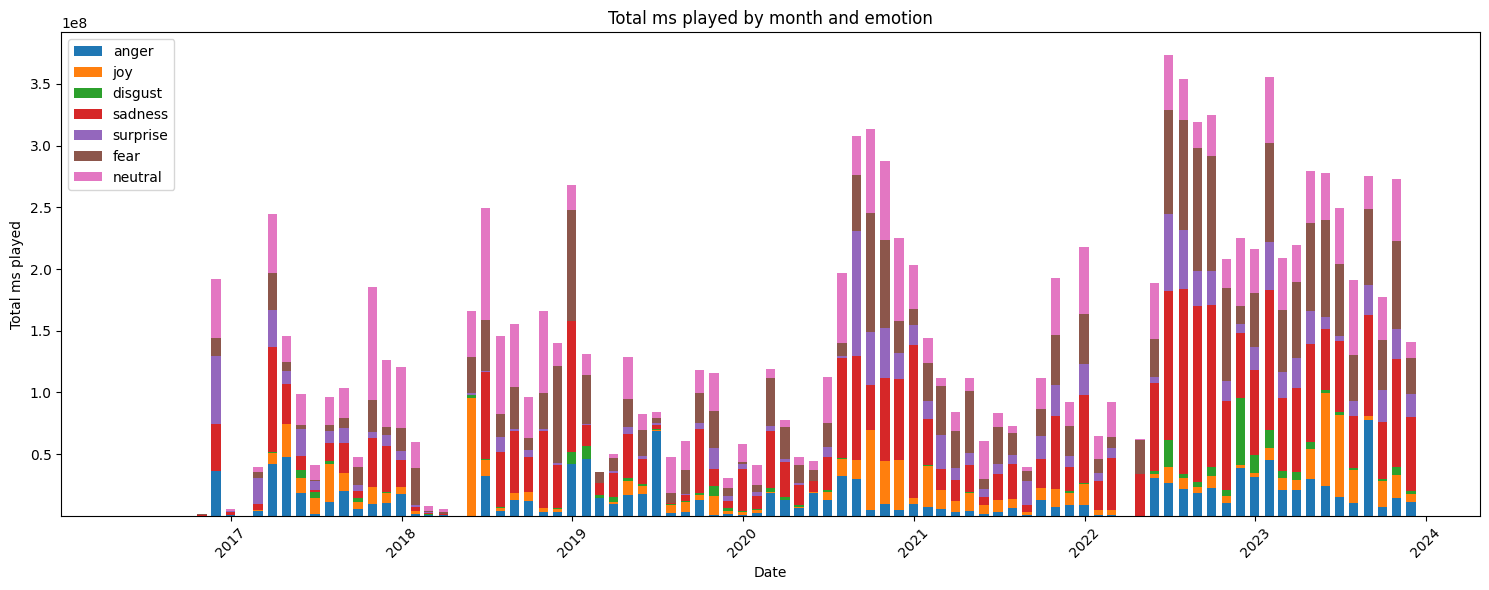

In [115]:
# Set up the figure size
plt.figure(figsize=(15, 6))

# Set bar width
bar_width = 20  # Adjust bar width

# set the bottom values
bottom_values = np.zeros(len(monthly_data))

# Loop through each emotion and create stacked bars
for emotion in ['anger', 'joy', 'disgust', 'sadness', 'surprise', 'fear', 'neutral']: # so we have consistent order
    emotion_column = f'{emotion}_ms_played_sum'
    plt.bar(monthly_data['ts'], monthly_data[emotion_column], width=bar_width, label=emotion, bottom=bottom_values)
    bottom_values += monthly_data[emotion_column]

# Plot the total ms_played_sum as a line
# plt.plot(monthly_data['ts'], monthly_data['total_ms_played_sum'], label='Total', color='black', linewidth=2, marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total ms played')
plt.title('Total ms played by month and emotion')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout for better fitting
plt.show()


### what's the most dominant emotion on each month?

In [121]:
# Determine the most dominant emotion of each month
# Use idxmax to find the index of the maximum value in the emotion columns
dominant_emotion_indices = monthly_data[['anger_ms_played_sum', 'joy_ms_played_sum', 
                                          'disgust_ms_played_sum', 'sadness_ms_played_sum', 
                                          'surprise_ms_played_sum', 'fear_ms_played_sum', 
                                          'neutral_ms_played_sum']].idxmax(axis=1)

# Check if all emotions are zero and assign 'none' if true
monthly_data['dominant_emotion'] = np.where(
    monthly_data[['anger_ms_played_sum', 'joy_ms_played_sum', 'disgust_ms_played_sum', 
                   'sadness_ms_played_sum', 'surprise_ms_played_sum', 'fear_ms_played_sum', 
                   'neutral_ms_played_sum']].sum(axis=1) == 0, 
    'none', 
    dominant_emotion_indices
)

# Remove the suffix to get just the emotion name
monthly_data['dominant_emotion'] = monthly_data['dominant_emotion'].str.replace('_ms_played_sum', '')

# Create a new column for the dominant emotion's playtime
monthly_data['dominant_emotion_played'] = monthly_data.apply(
    lambda row: row[f"{row['dominant_emotion']}_ms_played_sum"] if row['dominant_emotion'] != 'none' else 0, 
    axis=1
)

# Select relevant columns to display
result = monthly_data[['ts', 'total_ms_played_sum', 'dominant_emotion', 'dominant_emotion_played']]

# Display the result
print(result)

           ts  total_ms_played_sum dominant_emotion  dominant_emotion_played
0  2016-05-31              12262.0             fear                   5614.0
1  2016-06-30                  0.0             none                      0.0
2  2016-07-31                  0.0             none                      0.0
3  2016-08-31                  0.0             none                      0.0
4  2016-09-30                  0.0             none                      0.0
5  2016-10-31            1709993.0          sadness                 706636.0
6  2016-11-30          192104194.0         surprise               55169216.0
7  2016-12-31            5490803.0          sadness                2151739.0
8  2017-01-31                  0.0             none                      0.0
9  2017-02-28           39442051.0         surprise               21074476.0
10 2017-03-31          244623107.0          sadness               85789937.0
11 2017-04-30          146087702.0            anger               47777162.0

### dominant emotions ordered from the highest

In [125]:
# print the dominant emotion of all months from the result (highest to lowest)
result.groupby('dominant_emotion')['dominant_emotion_played'].sum().sort_values(ascending=False)

dominant_emotion
sadness     2.205636e+09
neutral     9.424892e+08
fear        6.388802e+08
joy         2.055193e+08
anger       1.965148e+08
surprise    1.964805e+08
none        0.000000e+00
Name: dominant_emotion_played, dtype: float64